In [1]:
import pandas as pd
# import numpy as np

# 读取数据
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 打印数据集形状
print(f"训练集形状: {train_df.shape}")
print(f"测试集形状: {test_df.shape}")

# 查看前几行
train_df.head()


训练集形状: (1458644, 11)
测试集形状: (625134, 9)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [3]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [4]:
train_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
clean_df = train_df.copy()
print(f"清洗前数据形状:{clean_df.shape}")
clean_df = clean_df[(clean_df['trip_duration'] >= 10) & (clean_df['trip_duration'] <= 7200)]
claen_df = clean_df[(clean_df['passenger_count'] > 0) & (clean_df['passenger_count'] <= 6)]
clean_df = clean_df[
    (clean_df['pickup_longitude'].between(-75, -72)) &
    (clean_df['dropoff_longitude'].between(-75, -72))&
    (clean_df['pickup_latitude'].between(40, 42))&
    (clean_df['dropoff_latitude'].between(40, 42))
]
print(f"清洗后数据:{clean_df.shape}")

清洗前数据形状:(1458644, 11)
清洗后数据:(1454372, 11)


In [6]:
import pandas as pd
import holidays

clean_df['pickup_datetime'] = pd.to_datetime(clean_df['pickup_datetime'])

clean_df['pickup_hour'] = clean_df['pickup_datetime'].dt.hour
clean_df['pickup_weekday'] = clean_df['pickup_datetime'].dt.weekday
clean_df['pickup_month'] = clean_df['pickup_datetime'].dt.month
clean_df['pickup_date'] = clean_df['pickup_datetime'].dt.date

clean_df['is_weekend'] = clean_df['pickup_weekday'].isin([5, 6]).astype(int)
clean_df['is_rush_hour'] = clean_df['pickup_hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)

us_holidays = holidays.UnitedStates()
clean_df['pickup_holiday'] = clean_df['pickup_date'].apply(lambda x: int(x in us_holidays))

print(f"构造时间特征后:{clean_df.shape}")

构造时间特征后:(1454372, 18)


In [7]:
import numpy as np

lat_factor = 111.2
lon_factor = np.cos(np.deg2rad(clean_df['pickup_latitude'])) * 111.2

clean_df['delta_longitude'] = np.abs(clean_df['dropoff_longitude'] - clean_df['pickup_longitude'])
clean_df['delta_latitude'] = np.abs(clean_df['dropoff_latitude'] - clean_df['pickup_latitude'])

clean_df['euclidean_distance'] = np.sqrt(clean_df['delta_longitude'] ** 2 + clean_df['delta_latitude'] ** 2)

clean_df['manhattan_distance'] = clean_df['delta_longitude'] + clean_df['delta_latitude']

# clean_df['trip_speed'] = clean_df['euclidean_distance']/(clean_df['trip_duration'] + 1e-5)

print(f"构造距离与速度类特征:{clean_df.shape}")

构造距离与速度类特征:(1454372, 22)


In [8]:
import pandas as pd
import numpy as np

clean_df['log_trip_duration'] = np.log1p(clean_df['trip_duration'])

feature_cols = [
    'passenger_count',
    'pickup_hour',
    'pickup_month',
    'pickup_weekday',
    'is_rush_hour',
    'is_weekend',
    'euclidean_distance',
    'manhattan_distance',
    
]

x = clean_df[feature_cols]
y = clean_df['log_trip_duration']

print(f"特征矩阵x形状:{x.shape}")
print(f"目标变量y样本数:{y.shape}")

特征矩阵x形状:(1454372, 8)
目标变量y样本数:(1454372,)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams['font.family'] = 'PingFang SC'
# sns.set(style = "whitegrid")

# plt.figure(figsize = (10, 4))

# sns.histplot(clean_df['trip_speed'], bins = 1000, color = 'tomato')
# plt.title("trip_duration distribution")
# plt.xlabel("trip_duration (seconds)")
# plt.show()

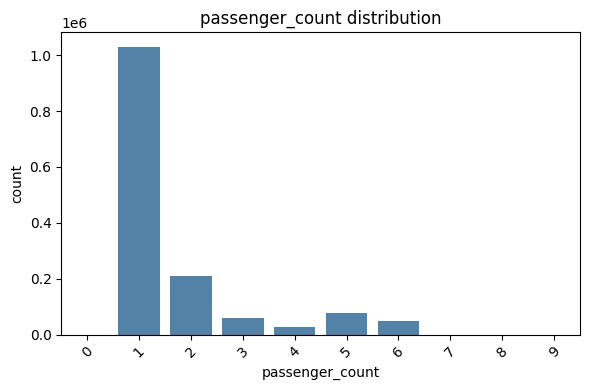

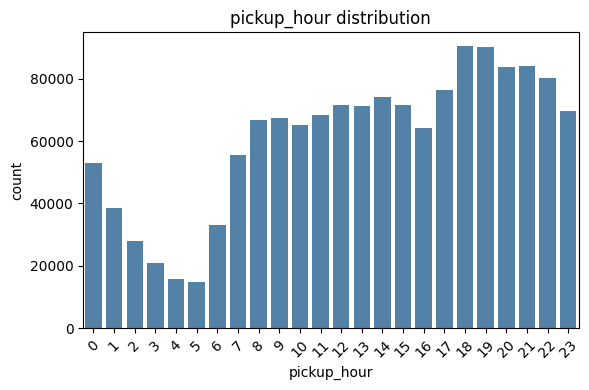

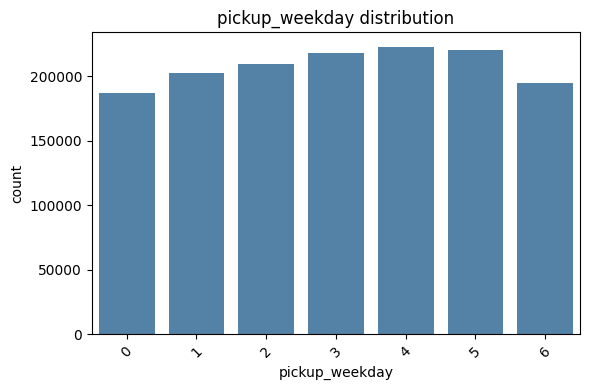

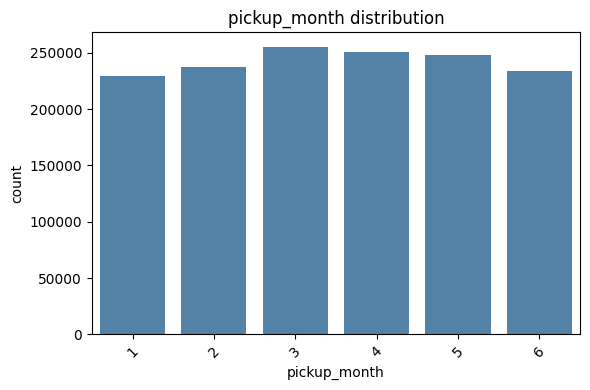

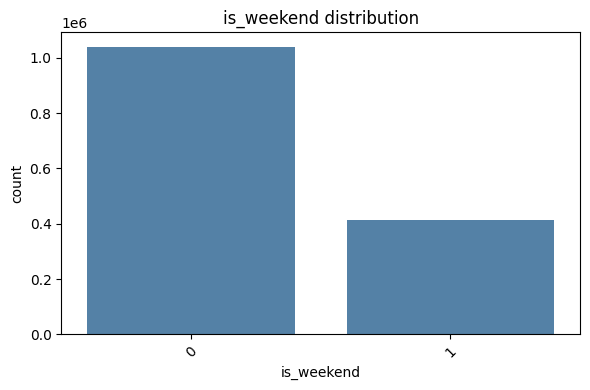

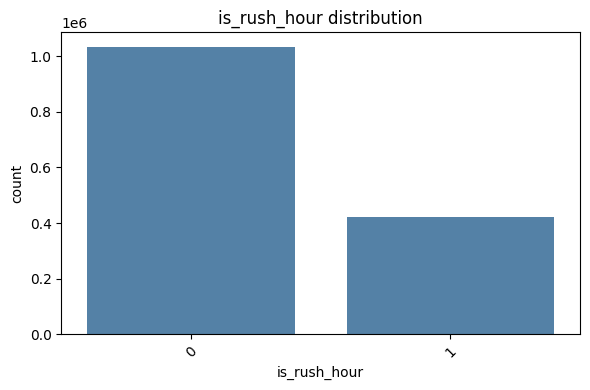

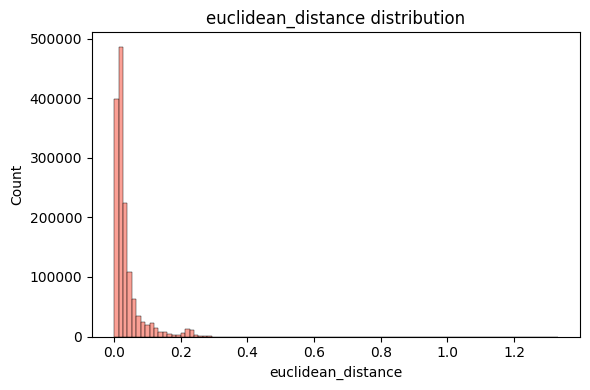

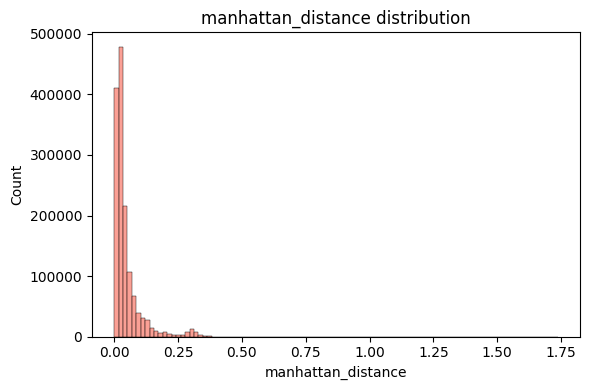

In [14]:
discrete_features = ['passenger_count', 'pickup_hour', 'pickup_weekday', 'pickup_month', 'is_weekend', 'is_rush_hour']
continuous_features = ['euclidean_distance', 'manhattan_distance']

# 离散变量用 countplot
for col in discrete_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=clean_df, x=col, color='steelblue')
    plt.title(f"{col} distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 连续变量用 histplot
for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=clean_df, x=col, bins=100, color='salmon')
    plt.title(f"{col} distribution")
    plt.tight_layout()
    plt.show()

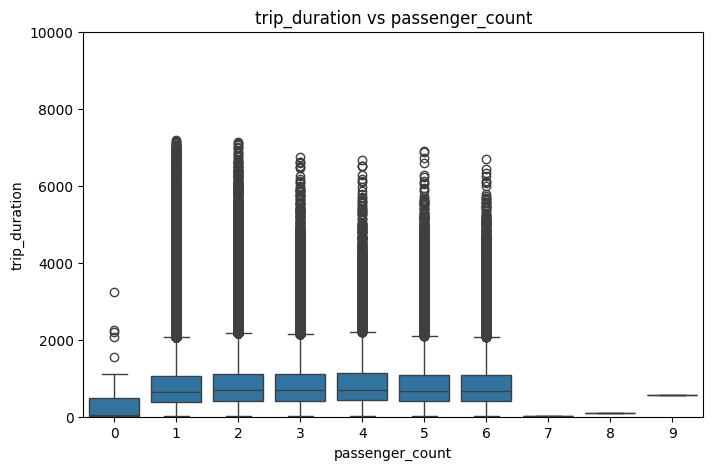

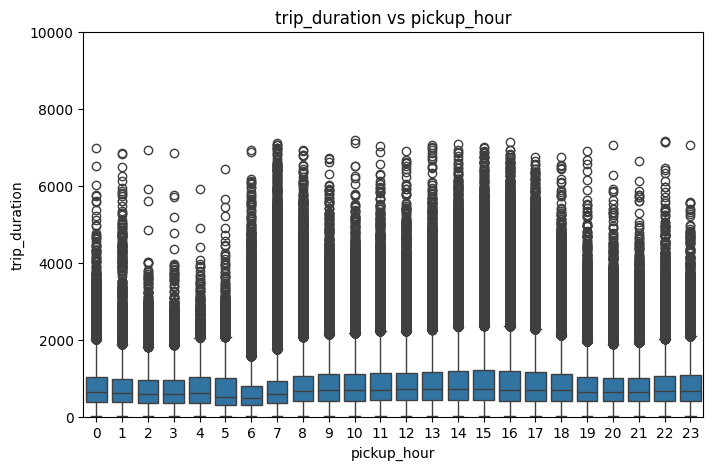

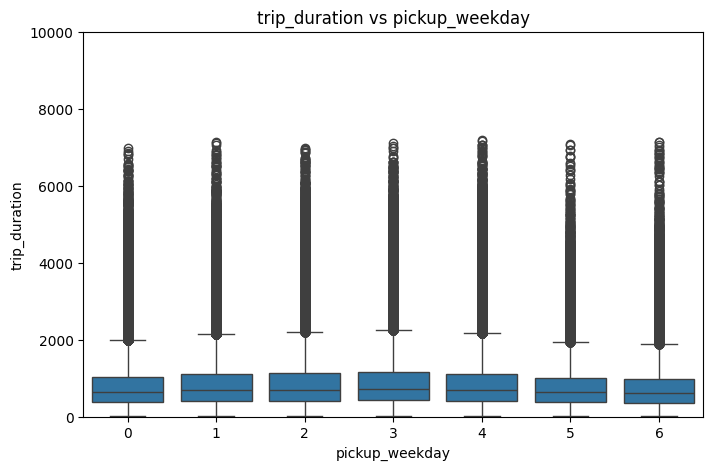

In [15]:
for col in['passenger_count','pickup_hour','pickup_weekday']:
    plt.figure(figsize = (8, 5))
    sns.boxplot(x = col, y = 'trip_duration', data = clean_df)
    plt.ylim(0, 10000)
    plt.title(f"trip_duration vs {col}")
    plt.show()

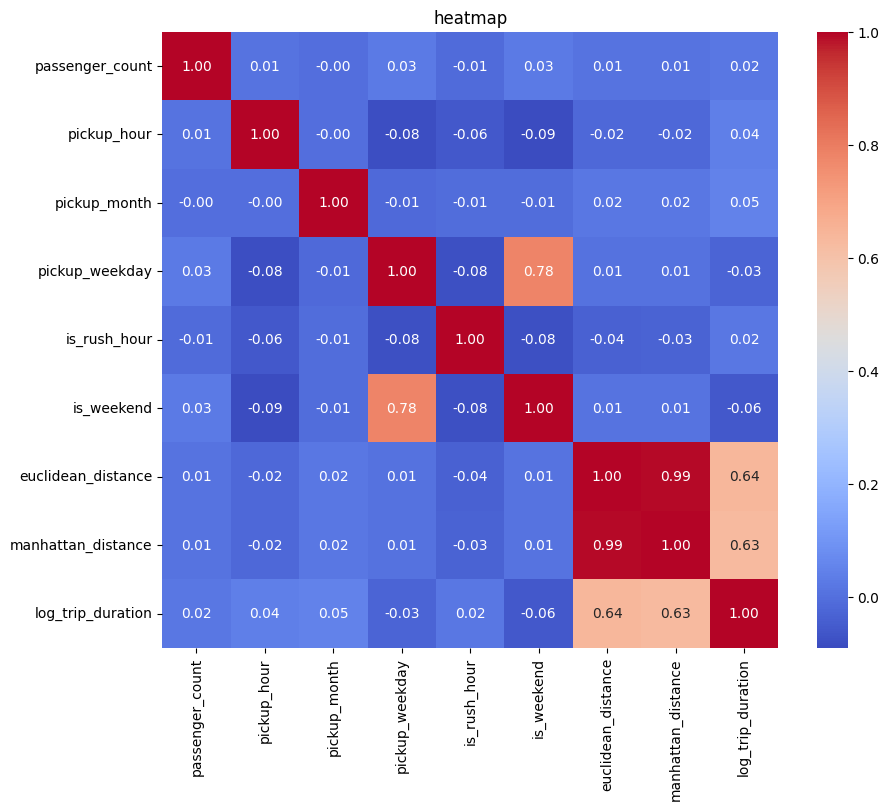

In [16]:
corr_cols = feature_cols + ['log_trip_duration']
corr_matrix = clean_df[corr_cols].corr()

plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", square = True)
plt.title(f"heatmap")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    x, y,
    test_size = 0.2,
    random_state = 42,
    shuffle = True
)

print(f"x_train:{x_train.shape}, y_train:{y_train.shape}")
print(f"x_valid:{x_valid.shape}, y_valid:{y_valid.shape}")

x_train:(1163497, 8), y_train:(1163497,)
x_valid:(290875, 8), y_valid:(290875,)


In [18]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from lightgbm import early_stopping, log_evaluation

lgb_model = LGBMRegressor(
    objective='regression',
    learning_rate=0.10,        # 提高学习率
    n_estimators=3000,         # 给足上限
    num_leaves=64,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(
    x_train, y_train,
    eval_set = [(x_valid, y_valid)],
    eval_metric = 'rmse',
    callbacks = [
        early_stopping(stopping_rounds = 50),
        log_evaluation(period = 50)
    ]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 1163497, number of used features: 8
[LightGBM] [Info] Start training from score 6.465673
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 0.407131	valid_0's l2: 0.165755
[100]	valid_0's rmse: 0.404629	valid_0's l2: 0.163725
[150]	valid_0's rmse: 0.403862	valid_0's l2: 0.163104
[200]	valid_0's rmse: 0.403592	valid_0's l2: 0.162887
[250]	valid_0's rmse: 0.403557	valid_0's l2: 0.162858
[300]	valid_0's rmse: 0.403446	valid_0's l2: 0.162769
[350]	valid_0's rmse: 0.403523	valid_0's l2: 0.162831
Early stopping, best iteration is:
[301]	valid_0's rmse: 0.403441	valid_0's l2: 0.162765


LGBMRegressor(colsample_bytree=0.8, max_depth=8, n_estimators=3000, n_jobs=-1,
              num_leaves=64, objective='regression', random_state=42,
              subsample=0.8)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred_log = lgb_model.predict(x_valid)

y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_valid)

In [20]:
def evaluate_regression(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"RMSE:{rmse:.2f}")
    print(f"MAE:{mae:.2f}")
    print(f"r2:{r2:.4f}")

evaluate_regression(y_true, y_pred)

RMSE:340.30
MAE:215.94
r2:0.7320


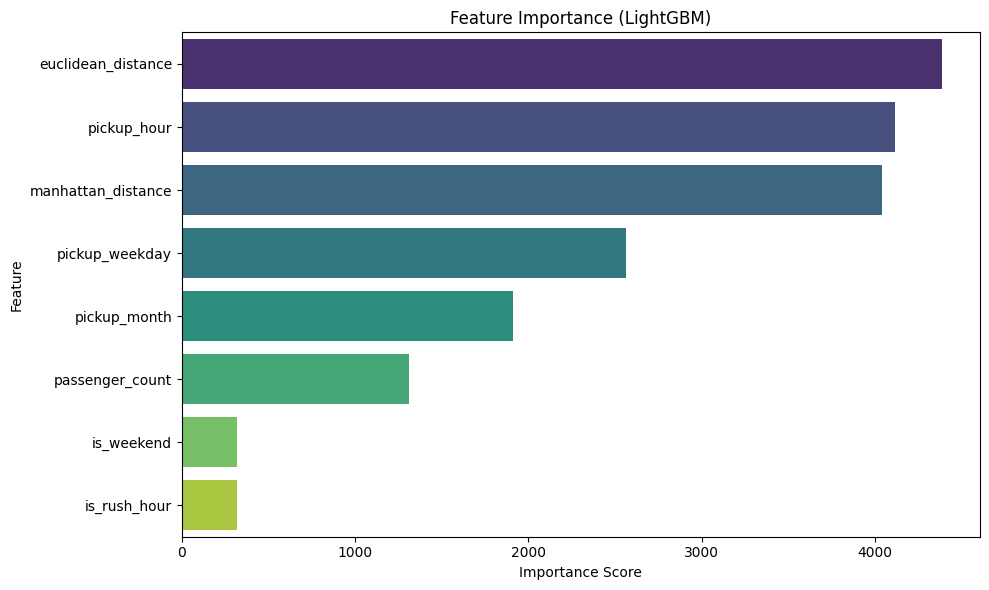

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = lgb_model.feature_importances_
feature_names = x_train.columns

importance_df = pd.DataFrame({
    'Feature':feature_names,
    'Importance':feature_importance
}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(
    data = importance_df, 
    x = 'Importance', 
    y = 'Feature', 
    hue = 'Feature',
    palette = 'viridis',
    legend = False
)
plt.title("Feature Importance (LightGBM)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [22]:
# 转换时间为 datetime 格式
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])

# 时间特征
test_df['pickup_hour'] = test_df['pickup_datetime'].dt.hour
test_df['pickup_weekday'] = test_df['pickup_datetime'].dt.weekday
test_df['pickup_month'] = test_df['pickup_datetime'].dt.month
test_df['is_weekend'] = test_df['pickup_weekday'].isin([5, 6]).astype(int)
test_df['is_rush_hour'] = test_df['pickup_hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)

# 地理特征
test_df['euclidean_distance'] = np.sqrt(
    (test_df['pickup_latitude'] - test_df['dropoff_latitude']) ** 2 +
    (test_df['pickup_longitude'] - test_df['dropoff_longitude']) ** 2
)

test_df['manhattan_distance'] = (
    abs(test_df['pickup_latitude'] - test_df['dropoff_latitude']) +
    abs(test_df['pickup_longitude'] - test_df['dropoff_longitude'])
)

# # 由于 test 集没有 trip_duration，我们无法计算速度，但可估计为：
# test_df['trip_speed'] = test_df['euclidean_distance'] / 1.0  # 默认速度估计值（或设置为均值）

In [23]:
x_test = test_df[feature_cols]

test_preds_log = lgb_model.predict(x_test)
test_pred = np.expm1(test_preds_log)

In [24]:
submission = pd.DataFrame({
    'id':test_df['id'],
    'trip_duration':test_pred.round()
})

submission.to_csv("submission.csv", index = False)
print("提交文件保存完成：submission.csv")

提交文件保存完成：submission.csv


In [25]:
import joblib
joblib.dump(lgb_model, "lgb_model.pkl")
print("模型保存完成：lgb_model.pkl")
# lgb_model = joblib.load("lgb_model.pkl")

模型保存完成：lgb_model.pkl


In [26]:
# 检查是否包含所有训练时用的特征
print(set(feature_cols) - set(test_df.columns))

set()


In [27]:
print(test_pred.min(), test_pred.max())
print(np.isnan(test_pred).sum())


32.294667729062084 4803.783377514561
0
